<a href="https://colab.research.google.com/github/luthra2059/Employee-Turnover-Prediction/blob/master/Employee_Turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
import pandas_profiling

In [2]:
plt.style.use('ggplot')

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

In [5]:
hr = pd.read_csv('/content/employee_data.csv')

In [6]:
hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [7]:
hr.shape

(14999, 10)

In [18]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

     |████████████████████████████████| 266kB 2.8MB/s 
     |████████████████████████████████| 604kB 7.8MB/s 
     |████████████████████████████████| 3.1MB 16.2MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 112kB 30.5MB/s 
     |████████████████████████████████| 296kB 31.1MB/s 
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=29e46294000ce482b15195660f3b0c4fa2fdc19a9ecf07784a101fd69cedf05b
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=2c64f7a72b296dad83edd2e12281af9afd9202019584a356c0d42ba9da010fc4
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291990 sha2

In [23]:
from pandas_profiling import ProfileReport

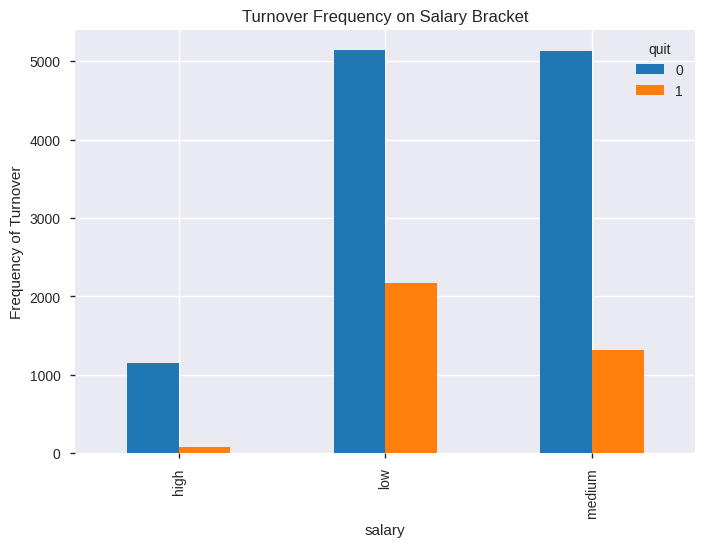

In [14]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Bracket')
plt.xlabel('salary')
plt.ylabel('Frequency of Turnover')
plt.show()

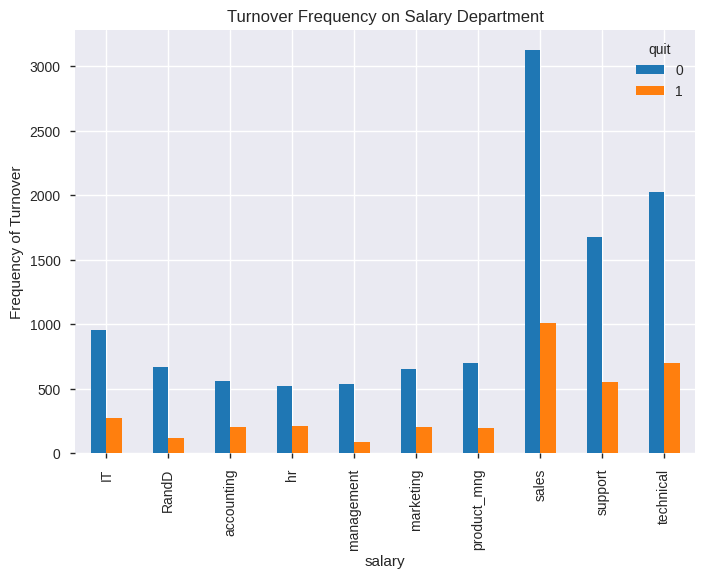

In [15]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title('Turnover Frequency on Salary Department')
plt.xlabel('salary')
plt.ylabel('Frequency of Turnover')
plt.show()

In [26]:
cat_vars = ['department', 'salary']
for var in cat_vars:
  cat_list = pd.get_dummies(hr[var], prefix=var)
  hr = hr.join(cat_list)

In [27]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [28]:
hr.drop(columns=['department', 'salary'], axis = 1, inplace=True)

In [29]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [30]:
hr.shape

(14999, 21)

In [31]:
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12,8]

AttributeError: ignored

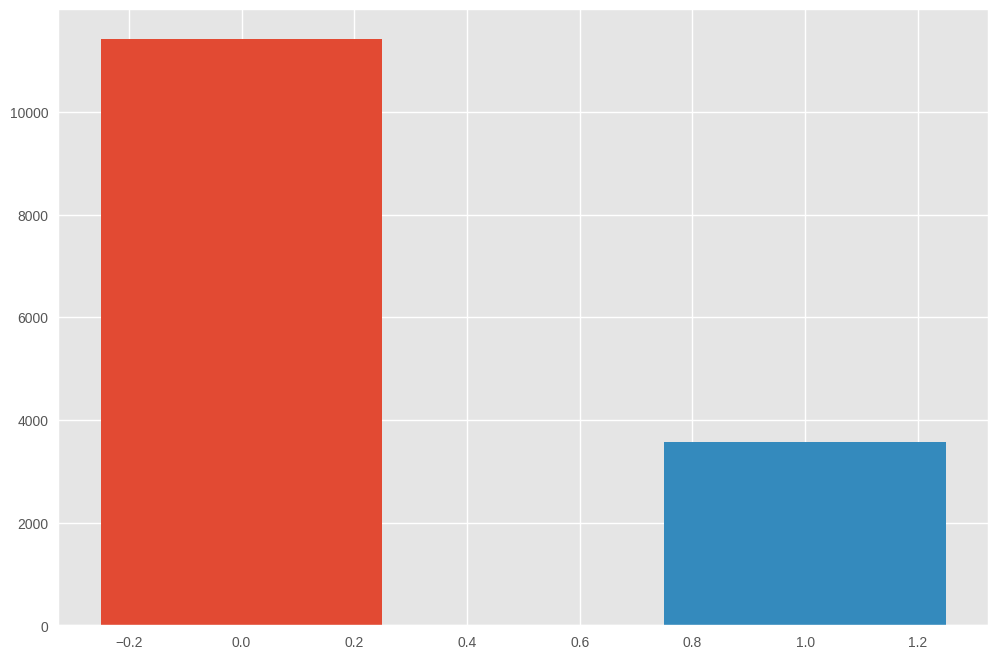

In [34]:
visualizer = ClassBalance(labels=['stayed', 'quit']).fit(hr.quit)
visualizer.show()

In [35]:
X = hr.loc[:, hr.columns!='quit']
y = hr.quit

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, stratify=y)

In [39]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [50]:
@interact
def plot_tree(
    crit=['gini', 'entropy'],
    split=['best', 'radom'],
    depth=IntSlider(min=1,max=30, value=2, continuous_update=False),
    min_split=IntSlider(min=2,max=5, value=2, continuous_update=False),
    min_leaf=IntSlider(min=1,max=5, value=1, continuous_update=False)):
  estimator = DecisionTreeClassifier(random_state=0,
                                     criterion=crit,
                                     splitter=split,
                                     max_depth=depth,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns, class_names=['stayed', 'quit'], filled=True))
  display(Image(data=graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [51]:
@interact
def plot_tree_rf(
    crit=['gini', 'entropy'],
    bootstrap=['True', 'False'],
    depth=IntSlider(min=1,max=30, value=2, continuous_update=False),
    forests=IntSlider(min=1,max=200, value=100, continuous_update=False),
    min_split=IntSlider(min=2,max=5, value=2, continuous_update=False),
    min_leaf=IntSlider(min=1,max=5, value=1, continuous_update=False)):
  estimator = RandomForestClassifier(random_state=0,
                                     criterion=crit,
                                     bootstrap=bootstrap,
                                     max_depth=depth,
                                     n_estimators=forests,
                                     n_jobs=-1,
                                     verbose=False,
                                     min_samples_split=min_split,
                                     min_samples_leaf=min_leaf)
  estimator.fit(X_train, y_train)
  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  print('\Visulaizing Tree:',0)
  graph = Source(tree.export_graphviz(num_tree,  out_file=None, feature_names=X_train.columns, class_names=['stayed', 'quit'], filled=True))
  display(Image(data=graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [66]:
from yellowbrick.classifier import ROCAUC

In [68]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [69]:
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0,
                       verbose=False, warm_start=False)

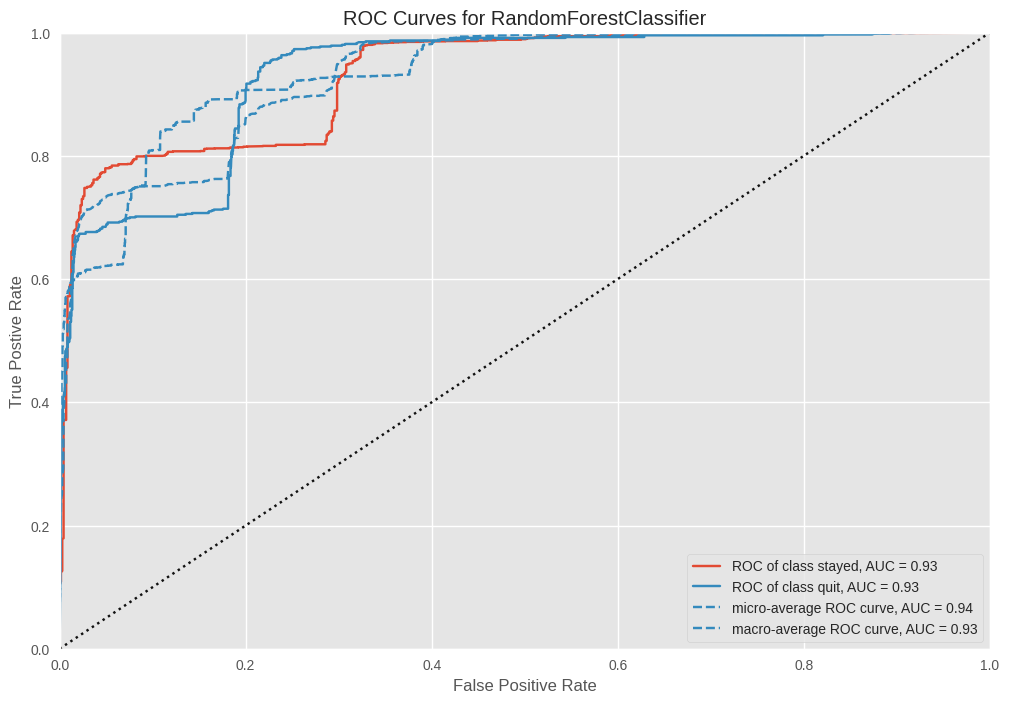

In [72]:
visualizer = ROCAUC(rf, classes=['stayed', 'quit'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

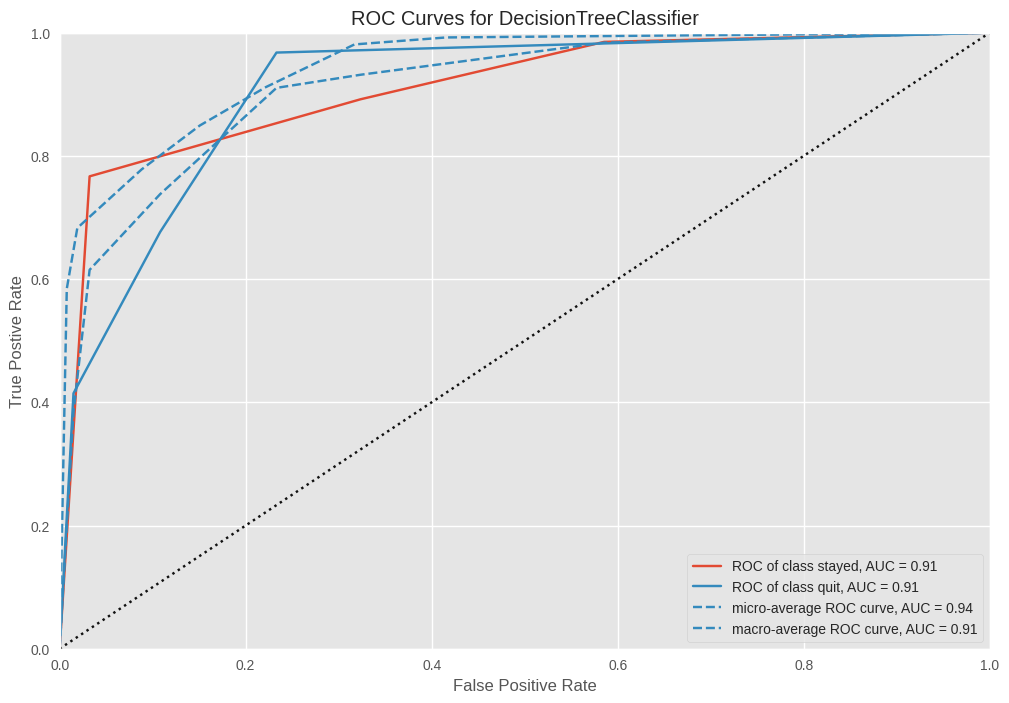

In [73]:
visualizer = ROCAUC(dt, classes=['stayed', 'quit'])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()